# Default Setup

In [26]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

/usr/lib/python3.6/threading.py:868: ResourceWarning: unclosed file <_io.FileIO name=59 mode='wb' closefd=True>
  del self._target, self._args, self._kwargs
/usr/lib/python3.6/threading.py:868: ResourceWarning: unclosed file <_io.FileIO name=61 mode='rb' closefd=True>
  del self._target, self._args, self._kwargs


Mounted at /content/drive


## Classifier with 3 Classes

Classification: 100%|██████████| 4127/4127 [00:00<00:00, 60385.38it/s]



              precision    recall  f1-score   support

    negative       0.33      0.77      0.46       651
     neutral       0.68      0.41      0.51      2085
    positive       0.59      0.57      0.58      1391

    accuracy                           0.52      4127
   macro avg       0.53      0.58      0.52      4127
weighted avg       0.60      0.52      0.53      4127


 Accuracy: 0.520

[ updating evaluations cache ]


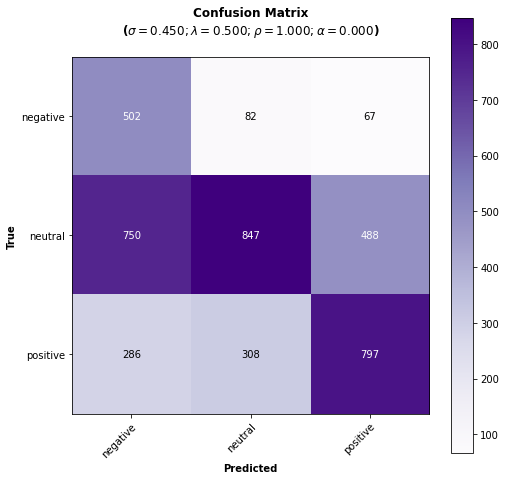

0.5165687542334911

In [2]:
df = pd.read_csv(path_root + data_root + "SemEval2017/SemEval2017-task4-dev.subtask-A.english.INPUT.txt", sep="\t", header=None)
df = df[[1,2]]
labels = df[1].to_list()
text = df[2].to_list()

X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)

clf = SS3()
clf.fit(X_train, y_train)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

# Try out util stuff

In [3]:
!pip3 install nltk
from nltk import word_tokenize, sent_tokenize, download
download('punkt')

!rm -rf vocab && mkdir vocab

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [29]:
from importlib import reload
util = reload(util)
print("Avg Number of Words", util.avg_sample_size(X_train, y_train, 'positive'))
print("Avg Number of Sentences", util.avg_sent_number(X_train, y_train, 'positive'))
print("Avg Number of Paragrahs", util.avg_para_number(X_train, y_train, 'positive'))
overlap, counter, ratio = util.calc_overlap(clf, 'fr')
print("Overlap Ratio", ratio)

Avg Number of Words 8.118327779460769
Avg Number of Sentences 0.6557406846410179
Avg Number of Paragrahs 0.3434110875492275
Overlap Ratio 0.4514314289286161


## Calculate the all word overlap
1. Get dictionaries
2. Use dictionaries to find overlaping words

In [0]:
!rm -rf vocab_two && mkdir vocab_two
clf.save_vocab(path="./vocab_two")

In [0]:
def get_vocab(vocab_dir, attribute):
  list_of_vocabs = {}

  for filename in os.listdir(vocab_dir):
    csv_file = pd.read_csv(vocab_dir + filename)
    list_of_vocabs[filename] = csv_file

  for key, value in list_of_vocabs.items():
    list_of_vocabs[key] = list_of_vocabs[key][["term", attribute]]

  return list_of_vocabs

vocab_two = get_vocab('./vocab_two/', 'fr')

In [0]:
def convert_to_df(list_of_vocabs, attribute):
  terms = []
  for key, value in list_of_vocabs.items():
    terms = list(set(list_of_vocabs[key]["term"].tolist()) | set(terms))
  pd.Series(terms).value_counts()

  new_keys = ["term"]
  for value in list(list_of_vocabs.keys()):
    if "bigram" not in value and "trigram" not in value:
      new_keys.append(value)

  data = np.zeros((len(terms), len(new_keys)))
  # Generate Empty Dataframe
  new_vocab = pd.DataFrame(data=data, columns = new_keys, dtype=float)
  new_vocab["term"] = terms
  new_vocab = new_vocab.set_index("term")

  # Fill Dataframe with values
  for key, value in list_of_vocabs.items():
    if "bigrams" in key:
      key = key.replace("bigrams", "words")
    if "trigrams" in key:
      key = key.replace("trigrams", "words")
    for index, row in value.iterrows():
      new_vocab[key][row["term"]] = row[attribute]
  return new_vocab

two_df = convert_to_df(vocab_two, 'fr')

In [14]:
two_df

,ss3_vocab_positive(words).csv,ss3_vocab_neutral(words).csv,ss3_vocab_negative(words).csv
term,,,
corner,3.0,5.0,3.0
mediacrooks,0.0,3.0,0.0
quickly,0.0,4.0,0.0
speech,3.0,16.0,15.0
almighty,7.0,0.0,0.0
...,...,...,...
citizen,0.0,0.0,5.0
retweets,0.0,2.0,0.0
wtf,3.0,14.0,10.0


In [9]:
from collections import defaultdict

def calc_word_overlap(vocab_df, important=False, a=None):
  overlap = defaultdict(int)
  counter_all = 0

  for keys, row in vocab_df.iterrows():
    print(keys, row)
    if not important:
      if np.count_nonzero(row) > 1:
        indices = row.to_numpy().nonzero()
        res_keys = vocab_df.keys()[indices[0]]
        overlap[tuple(res_keys)] += 1
        counter_all += 1
    else:
      if np.count_nonzero(row.ge(a)) > 1:
        indices = np.where(row.to_numpy() > a)
        res_keys = vocab_df.keys()[indices[0]]
        overlap[tuple(res_keys)] += 1
        counter_all += 1
  return overlap, counter_all

two_overlap, two_counter = calc_word_overlap(two_df)

Streaming output truncated to the last 5000 lines.
ss3_vocab_neutral(words).csv     0.0
ss3_vocab_negative(words).csv    0.0
Name: maja, dtype: float64
loyalty ss3_vocab_positive(words).csv    0.0
ss3_vocab_neutral(words).csv     2.0
ss3_vocab_negative(words).csv    0.0
Name: loyalty, dtype: float64
silver ss3_vocab_positive(words).csv    0.0
ss3_vocab_neutral(words).csv     3.0
ss3_vocab_negative(words).csv    0.0
Name: silver, dtype: float64
chrisbrown ss3_vocab_positive(words).csv    0.0
ss3_vocab_neutral(words).csv     2.0
ss3_vocab_negative(words).csv    0.0
Name: chrisbrown, dtype: float64
aap ss3_vocab_positive(words).csv    0.0
ss3_vocab_neutral(words).csv     2.0
ss3_vocab_negative(words).csv    0.0
Name: aap, dtype: float64
ik ss3_vocab_positive(words).csv    2.0
ss3_vocab_neutral(words).csv     0.0
ss3_vocab_negative(words).csv    0.0
Name: ik, dtype: float64
woman ss3_vocab_positive(words).csv    17.0
ss3_vocab_neutral(words).csv     17.0
ss3_vocab_negative(words).csv    17

In [0]:
sorted(two_overlap.items(), key=lambda kv: kv[1], reverse=True)

[(('ss3_vocab_positive(words).csv',
   'ss3_vocab_neutral(words).csv',
   'ss3_vocab_negative(words).csv'),
  1573),
 (('ss3_vocab_positive(words).csv', 'ss3_vocab_neutral(words).csv'), 1422),
 (('ss3_vocab_neutral(words).csv', 'ss3_vocab_negative(words).csv'), 545),
 (('ss3_vocab_positive(words).csv', 'ss3_vocab_negative(words).csv'), 79)]

In [0]:
print('Counter 2 Classes:', two_counter)
print('2 Classes Ratio:', two_counter/two_df.shape[0])

Counter 2 Classes: 3619
2 Classes Ratio: 0.44845105328376705


## Calculate the important word overlap

In [0]:
vocab_two_cv = get_vocab('./vocab_two/', 'cv')
vocab_two_cv_df = convert_to_df(vocab_two_cv, 'cv')
two_overlap_cv, two_counter_cv = calc_word_overlap(vocab_two_cv_df, important=True, a=0)
two_overlap_cv

defaultdict(int,
            {('ss3_vocab_negative(words).csv',): 566,
             ('ss3_vocab_neutral(words).csv',): 2872,
             ('ss3_vocab_neutral(words).csv',
              'ss3_vocab_negative(words).csv'): 594,
             ('ss3_vocab_positive(words).csv',): 1013,
             ('ss3_vocab_positive(words).csv',
              'ss3_vocab_negative(words).csv'): 84,
             ('ss3_vocab_positive(words).csv',
              'ss3_vocab_neutral(words).csv'): 1463,
             ('ss3_vocab_positive(words).csv',
              'ss3_vocab_neutral(words).csv',
              'ss3_vocab_negative(words).csv'): 1478})

In [0]:
print('Counter 2 Classes:', two_counter_cv)
print('Counter 2 Classes:', two_counter_cv/vocab_two_cv_df.shape[0])

Counter 2 Classes: 3619
Counter 2 Classes: 0.44845105328376705


In [0]:
vocab_two_cv_df.apply(np.count_nonzero, axis=0)

ss3_vocab_positive(words).csv    4038
ss3_vocab_neutral(words).csv     6407
ss3_vocab_negative(words).csv    2722
dtype: int64

In [0]:
two_df.apply(np.count_nonzero, axis=0)

ss3_vocab_positive(words).csv    4087
ss3_vocab_neutral(words).csv     6412
ss3_vocab_negative(words).csv    2763
dtype: int64